In [154]:
import json
import os
import pickle
import sqlite3
import time

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
users = pd.read_json('slack/users.json')
pickle.dump(users, open('users.pkl', 'wb'))
users.head()

,color,deleted,id,is_admin,is_app_user,is_bot,is_owner,is_primary_owner,is_restricted,is_ultra_restricted,name,profile,real_name,team_id,tz,tz_label,tz_offset,updated
0,e85d72,False,U62PGKS0K,0.0,False,False,0.0,0.0,0.0,0.0,3_sheets,"{'title': '', 'phone': '', 'skype': '', 'real_...",Tri Bui,T09F35L84,America/Chicago,Central Standard Time,-21600.0,1504308576
1,bc3663,False,U6M76UACU,0.0,False,False,0.0,0.0,0.0,0.0,absoluteblack,"{'title': '', 'phone': '', 'skype': '', 'real_...",absoluteblack,T09F35L84,America/Los_Angeles,Pacific Standard Time,-28800.0,1514327805
2,965d1b,False,U42KJM9LK,0.0,False,False,0.0,0.0,0.0,0.0,ahoneycu,"{'title': '', 'phone': '', 'skype': '', 'real_...",Adam Honeycutt,T09F35L84,America/Chicago,Central Standard Time,-21600.0,1504308446
3,NaN,True,U09PF6NQL,NaN,False,False,NaN,NaN,NaN,NaN,allusivetable,"{'title': '', 'phone': '', 'skype': '', 'real_...",NaN,T09F35L84,NaN,NaN,NaN,1504307474
4,NaN,True,U0KMN3ZLZ,NaN,False,True,NaN,NaN,NaN,NaN,astrobot,"{'title': 'Helpful astronomy stuff', 'phone': ...",NaN,T09F35L84,NaN,NaN,NaN,1504308066


In [112]:
conn = sqlite3.connect('messages.db')
cursor = conn.cursor()
cursor.execute('CREATE TABLE messages (user text, message text, ts text, channel text)')
conn.commit()

for channel in filter(lambda n: '.' not in n, os.listdir('slack')):
    print(channel)
    for filename in os.listdir('slack/' + channel):
        with open('slack/%s/%s' %(channel, filename)) as f:
            data = json.load(f)
            to_insert = []
            for message in data:
                try:
                    to_insert.append((message['user'], message['text'], message['ts'], channel))
                except KeyError:
                    pass
            cursor.executemany('INSERT INTO messages VALUES (?, ?, ?, ?)', to_insert)
            conn.commit()
conn.close()

books
cars
crypto
danke-dank-drank
dfw
discussions
fashion
flix
foo
food
games
general
jobs
ranked-5s
relationships
school
shitposting
swole-hole
tech
wallstreetbets
wubs


In [2]:
conn = sqlite3.connect('messages.db')
cursor = conn.cursor()

items = []
index = 0
for row in cursor.execute('SELECT * FROM messages'):
    items.append(row)
    index += 1
    if index % 10000 == 0:
        print(index)

messages = pd.DataFrame.from_records(items, columns=['user', 'text', 'ts', 'channel'])
print(messages.shape)
messages.head()

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
(417689, 4)


,user,text,ts,channel
0,U09F9MTNW,<@U09F9MTNW> has joined the channel,1478109634.000002,books
1,U09F9MTNW,<@U09F9MTNW> set the channel purpose: Donde es...,1478109635.000003,books
2,U1DNKS6L9,<@U1DNKS6L9> has joined the channel,1478109651.000004,books
3,U1DNKS6L9,yay,1478109655.000005,books
4,U09FH8D37,<@U09FH8D37> has joined the channel,1478109659.000006,books


In [114]:
df = users.merge(messages, left_on='id', right_on='user')
df.head()

,color,deleted,id,is_admin,is_app_user,is_bot,is_owner,is_primary_owner,is_restricted,is_ultra_restricted,...,real_name,team_id,tz,tz_label,tz_offset,updated,user,text,ts,channel
0,e85d72,False,U62PGKS0K,0.0,False,False,0.0,0.0,0.0,0.0,...,Tri Bui,T09F35L84,America/Chicago,Central Standard Time,-21600.0,1504308576,U62PGKS0K,<@U62PGKS0K> has joined the channel,1499016587.475300,food
1,e85d72,False,U62PGKS0K,0.0,False,False,0.0,0.0,0.0,0.0,...,Tri Bui,T09F35L84,America/Chicago,Central Standard Time,-21600.0,1504308576,U62PGKS0K,<@U62PGKS0K> has joined the channel,1499017144.490154,games
2,e85d72,False,U62PGKS0K,0.0,False,False,0.0,0.0,0.0,0.0,...,Tri Bui,T09F35L84,America/Chicago,Central Standard Time,-21600.0,1504308576,U62PGKS0K,<@U62PGKS0K> has joined the channel,1499016587.041286,general
3,e85d72,False,U62PGKS0K,0.0,False,False,0.0,0.0,0.0,0.0,...,Tri Bui,T09F35L84,America/Chicago,Central Standard Time,-21600.0,1504308576,U62PGKS0K,<@U62PGKS0K> has joined the channel,1499016587.522570,wubs
4,bc3663,False,U6M76UACU,0.0,False,False,0.0,0.0,0.0,0.0,...,absoluteblack,T09F35L84,America/Los_Angeles,Pacific Standard Time,-28800.0,1514327805,U6M76UACU,<@U6M76UACU> has joined the channel,1502406257.563445,food


[Text(0,0,'foo'),
 Text(0,0,'general'),
 Text(0,0,'discussions'),
 Text(0,0,'ranked-5s'),
 Text(0,0,'jobs'),
 Text(0,0,'wallstreetbets'),
 Text(0,0,'shitposting'),
 Text(0,0,'school'),
 Text(0,0,'dfw'),
 Text(0,0,'food'),
 Text(0,0,'games'),
 Text(0,0,'relationships'),
 Text(0,0,'wubs'),
 Text(0,0,'flix'),
 Text(0,0,'crypto'),
 Text(0,0,'danke-dank-drank'),
 Text(0,0,'fashion'),
 Text(0,0,'swole-hole'),
 Text(0,0,'cars'),
 Text(0,0,'tech'),
 Text(0,0,'books')]

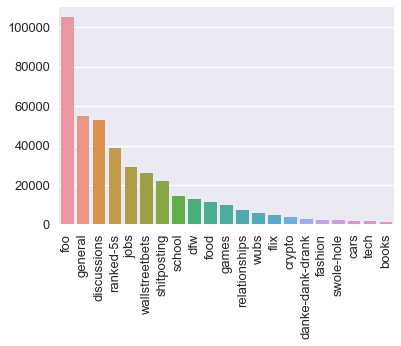

In [115]:
is_dup = df['channel'].value_counts()
sns.set()
sns.set_context('talk')
g = sns.barplot(x=is_dup.index, y=is_dup.values)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [120]:
from datetime import datetime
df['hr'] = df['ts'].apply(float).apply(int).apply(datetime.fromtimestamp).apply(lambda t: t.hour)
df.head()

,color,deleted,id,is_admin,is_app_user,is_bot,is_owner,is_primary_owner,is_restricted,is_ultra_restricted,...,team_id,tz,tz_label,tz_offset,updated,user,text,ts,channel,hr
0,e85d72,False,U62PGKS0K,0.0,False,False,0.0,0.0,0.0,0.0,...,T09F35L84,America/Chicago,Central Standard Time,-21600.0,1504308576,U62PGKS0K,<@U62PGKS0K> has joined the channel,1499016587.475300,food,11
1,e85d72,False,U62PGKS0K,0.0,False,False,0.0,0.0,0.0,0.0,...,T09F35L84,America/Chicago,Central Standard Time,-21600.0,1504308576,U62PGKS0K,<@U62PGKS0K> has joined the channel,1499017144.490154,games,11
2,e85d72,False,U62PGKS0K,0.0,False,False,0.0,0.0,0.0,0.0,...,T09F35L84,America/Chicago,Central Standard Time,-21600.0,1504308576,U62PGKS0K,<@U62PGKS0K> has joined the channel,1499016587.041286,general,11
3,e85d72,False,U62PGKS0K,0.0,False,False,0.0,0.0,0.0,0.0,...,T09F35L84,America/Chicago,Central Standard Time,-21600.0,1504308576,U62PGKS0K,<@U62PGKS0K> has joined the channel,1499016587.522570,wubs,11
4,bc3663,False,U6M76UACU,0.0,False,False,0.0,0.0,0.0,0.0,...,T09F35L84,America/Los_Angeles,Pacific Standard Time,-28800.0,1514327805,U6M76UACU,<@U6M76UACU> has joined the channel,1502406257.563445,food,17


In [142]:
times = df[['hr', 'channel']]
tp = times.set_index('hr').groupby(level='hr').apply(lambda g: g.apply(pd.value_counts)).unstack(level=1).fillna(0)
tp

channel                                                                    \
     books   cars crypto danke-dank-drank     dfw discussions fashion   flix   
hr                                                                             
0      2.0    3.0   51.0              8.0   166.0       159.0     3.0  111.0   
1     12.0    0.0    3.0              2.0    37.0        39.0     9.0   25.0   
2      4.0    3.0   28.0              0.0    25.0        46.0     0.0   10.0   
3      0.0    0.0    5.0              1.0    11.0        19.0     0.0    5.0   
4      0.0    0.0   10.0              1.0     5.0        10.0     0.0    5.0   
5      1.0    3.0   18.0              2.0     7.0        33.0     0.0    2.0   
6      2.0    6.0   42.0              8.0    68.0       101.0     2.0   31.0   
7      9.0   15.0  243.0             16.0    79.0       408.0    20.0   34.0   
8     43.0  120.0  143.0            243.0   511.0      2227.0    43.0  218.0   
9     34.0  220.0  194.0            201.0   446.0      4378.0   329.0  336.0   
10    74.0  148.0  123.0            118.0   744.0      5878.0   382.0  347.0   
11    48.0  221.0  375.0            179.0   725.0      4084.0   384.0  304.0   
12    90.0  197.0  195.0            260.0   577.0      4946.0   131.0  354.0   
13    66.0  318.0  370.0            200.0   929.0      5090.0   140.0  417.0   
14   193.0   77.0  202.0            242.0   929.0      6279.0    51.0  279.0   
15    59.0   86.0  180.0            299.0  1166.0      5234.0    96.0  130.0   
16    22.0  109.0  536.0            115.0  1203.0      3150.0   322.0  205.0   
17   118.0  101.0  186.0             64.0  1375.0      1519.0   170.0  157.0   
18     9.0   78.0  277.0             63.0   710.0      1186.0    85.0  180.0   
19    65.0   35.0  182.0             72.0   543.0      1176.0   101.0  274.0   
20    56.0   52.0   62.0            200.0   653.0      2207.0    95.0  328.0   
21    74.0   46.0  195.0            115.0   884.0      2156.0    56.0  400.0   
22   157.0   53.0  171.0             90.0   713.0      1735.0    18.0  397.0   
23     7.0   75.0   36.0             15.0   421.0       680.0    11.0  362.0   

                     ...                                                    \
        foo    food  ...   general    jobs ranked-5s relationships  school   
hr                   ...                                                     
0    1114.0   107.0  ...     503.0    33.0    1332.0         135.0   123.0   
1     418.0   117.0  ...     464.0    11.0     894.0          16.0    50.0   
2     127.0    15.0  ...      82.0    25.0     275.0          14.0    15.0   
3      35.0    13.0  ...      22.0     7.0     137.0           3.0     4.0   
4      25.0    13.0  ...      47.0     0.0      73.0           1.0     2.0   
5      40.0    21.0  ...      45.0    12.0      41.0           4.0     0.0   
6      91.0    19.0  ...     149.0    24.0      34.0           7.0     5.0   
7     568.0    57.0  ...     359.0   267.0      92.0          26.0    47.0   
8    4838.0   393.0  ...    3828.0  1990.0     494.0          85.0   456.0   
9    8423.0  1090.0  ...    4334.0  3586.0     805.0         300.0   894.0   
10   8475.0   688.0  ...    6906.0  2680.0    1571.0         389.0  1108.0   
11   6250.0   952.0  ...    3037.0  2386.0    2143.0         331.0   608.0   
12   8473.0  1011.0  ...    3978.0  3089.0    1706.0         558.0  1087.0   
13  11731.0   922.0  ...    5810.0  3830.0    3001.0         544.0  2273.0   
14  11683.0   655.0  ...    4399.0  3525.0    4445.0         456.0  1630.0   
15  10439.0  1343.0  ...    4500.0  2820.0    3107.0         725.0  1101.0   
16   6536.0   616.0  ...    2455.0  1507.0    2813.0         483.0  1085.0   
17   4323.0   589.0  ...    2168.0   825.0    2459.0         659.0   881.0   
18   3575.0   567.0  ...    1447.0   693.0    2268.0         365.0   804.0   
19   2840.0   690.0  ...    2344.0   303.0    2574.0         237.0   434.0   
20   4303.0   521.0  ...    2872.0   480.0    26

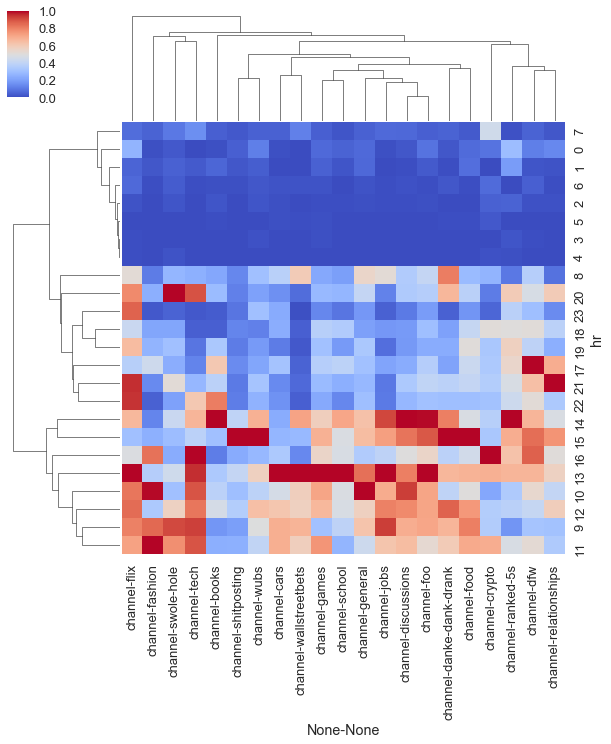

In [130]:
sns.clustermap(tp, cmap='coolwarm', standard_scale=1)

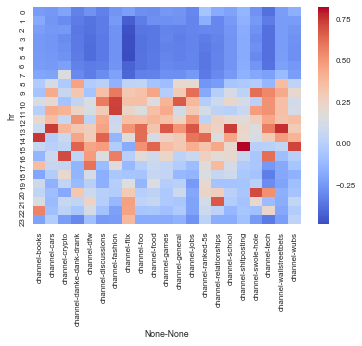

In [163]:
norm_tp = (tp - tp.mean()) / (tp.max() - tp.min())
sns.set_context('poster')
sns.set(font_scale=0.8)
sns.heatmap(norm_tp, cmap='coolwarm')

In [218]:
times = df[['hr', 'name']]
tp = times.set_index('hr').groupby(level='hr').apply(lambda g: g.apply(pd.value_counts)).unstack(level=1).fillna(0)
tp = tp.T[tp.sum() > 100].T
tp

name                                                 \
   at4twalker atantillo atvaccaro atypicalteen brad.lindroth   
hr                                                             
0         1.0       0.0     369.0         19.0           7.0   
1         0.0       0.0     154.0         15.0           0.0   
2         0.0       0.0      63.0          5.0          14.0   
3         1.0       0.0      14.0          3.0           0.0   
4         0.0       0.0      18.0          2.0           0.0   
5         0.0       0.0      13.0          1.0           0.0   
6        13.0       0.0      71.0          3.0           0.0   
7         1.0       0.0     538.0         17.0           0.0   
8        25.0       3.0    4239.0         64.0           0.0   
9        13.0       6.0    7980.0         78.0           2.0   
10       18.0       7.0    8401.0        187.0           2.0   
11       61.0      12.0    6063.0        108.0           3.0   
12       45.0      21.0    7379.0        138.0           7.0   
13       32.0      30.0   10094.0         76.0           0.0   
14       22.0      37.0    8519.0        105.0           5.0   
15       77.0       5.0    7713.0         90.0           4.0   
16       76.0       1.0    4466.0         69.0          13.0   
17       57.0       3.0    2817.0         74.0           1.0   
18       18.0       1.0    2033.0         43.0           0.0   
19       10.0       0.0    2038.0         61.0           0.0   
20       18.0       1.0    3055.0        107.0           0.0   
21       10.0       2.0    3327.0        130.0           8.0   
22        0.0       0.0    2476.0         85.0          35.0   
23        1.0       0.0    1185.0         48.0          10.0   

                                                        ...               \
   brogan.fundergurg     cb   chris cystocele doobler   ...   rfrederick   
hr                                                      ...                
0               56.0   78.0    99.0     107.0     1.0   ...          2.0   
1               12.0   48.0    21.0      96.0     3.0   ...          0.0   
2                6.0    0.0    17.0      34.0     0.0   ...          0.0   
3                2.0    0.0    13.0      36.0     0.0   ...          0.0   
4                6.0    0.0     6.0       5.0     0.0   ...          0.0   
5               25.0    0.0    42.0      11.0     0.0   ...          8.0   
6              109.0    0.0   131.0      10.0     1.0   ...         51.0   
7              318.0    0.0   570.0      11.0     0.0   ...         73.0   
8              605.0    0.0  1848.0      32.0     0.0   ...        266.0   
9             1000.0    0.0  2053.0     108.0    18.0   ...        267.0   
10             764.0    1.0  2135.0     156.0     7.0   ...        253.0   
11             522.0    5.0  1966.0     174.0     2.0   ...        123.0   
12             616.0  236.0  2012.0      91.0     4.0   ...        178.0   
13             734.0  241.0  2771.0     201.0    51.0   ...        239.0   
14             842.0   17.0  2475.0     208.0    10.0   ...        209.0   
15            1048.0   84.0  1337.0     229.0     3.0   ...        103.0   
16             766.0   47.0   919.0     280.0     0.0   ...         44.0   
17             530.0  188.0   532.0     297.0     0.0   ...         35.0   
18             404.0  167.0   607.0     261.0     0.0   ...         73.0   
19             355.0   17.0   458.0     201.0     3.0   ...         39.0   
20             476.0    0.0   743.0     317.0     0.0   ...         31.0   
21             264.0   52.0   593.0     317.0     1.0   ...          9.0   
22             372.0   38.0   701.0     218.0     3.0   ...         11.0   
23              91.0  112.0   187.0     234.0     5.0   ...          2.0   

                                                                     \
   saethlin   saku soumilele   tommy veleto vince.r.cooley waumpus_   
hr                                                                    
0    1577.0  1

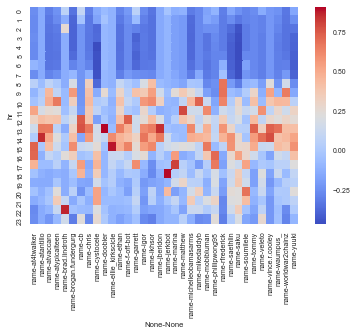

In [217]:
norm_tp = (tp - tp.mean()) / (tp.max() - tp.min())
sns.set_context('poster')
sns.set(font_scale=0.7)
sns.heatmap(norm_tp, cmap='coolwarm')

In [5]:
users.head()

,color,deleted,id,is_admin,is_app_user,is_bot,is_owner,is_primary_owner,is_restricted,is_ultra_restricted,name,profile,real_name,team_id,tz,tz_label,tz_offset,updated
0,e85d72,False,U62PGKS0K,0.0,False,False,0.0,0.0,0.0,0.0,3_sheets,"{'title': '', 'phone': '', 'skype': '', 'real_...",Tri Bui,T09F35L84,America/Chicago,Central Standard Time,-21600.0,1504308576
1,bc3663,False,U6M76UACU,0.0,False,False,0.0,0.0,0.0,0.0,absoluteblack,"{'title': '', 'phone': '', 'skype': '', 'real_...",absoluteblack,T09F35L84,America/Los_Angeles,Pacific Standard Time,-28800.0,1514327805
2,965d1b,False,U42KJM9LK,0.0,False,False,0.0,0.0,0.0,0.0,ahoneycu,"{'title': '', 'phone': '', 'skype': '', 'real_...",Adam Honeycutt,T09F35L84,America/Chicago,Central Standard Time,-21600.0,1504308446
3,NaN,True,U09PF6NQL,NaN,False,False,NaN,NaN,NaN,NaN,allusivetable,"{'title': '', 'phone': '', 'skype': '', 'real_...",NaN,T09F35L84,NaN,NaN,NaN,1504307474
4,NaN,True,U0KMN3ZLZ,NaN,False,True,NaN,NaN,NaN,NaN,astrobot,"{'title': 'Helpful astronomy stuff', 'phone': ...",NaN,T09F35L84,NaN,NaN,NaN,1504308066


[Text(0,0,'atvaccaro'),
 Text(0,0,'atypicalteen'),
 Text(0,0,'chris'),
 Text(0,0,'cystocele'),
 Text(0,0,'ethan'),
 Text(0,0,'ikhsor'),
 Text(0,0,'michelleobamasarms'),
 Text(0,0,'saethlin'),
 Text(0,0,'worldwar2chainz')]

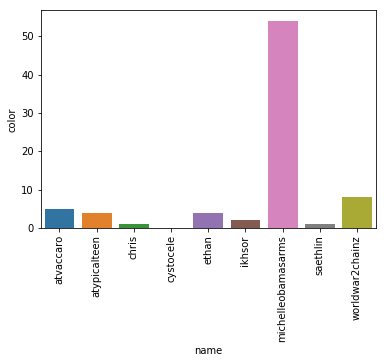

In [36]:
df = users.merge(messages, left_on='id', right_on='user')
buzzfeed_counts = df[df['text'].str.contains('buzzfeed.com')].groupby('name').agg('count')
buzzfeed_counts.reset_index(inplace=True)
g = sns.barplot(x='name', y='color', data=buzzfeed_counts)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [38]:
messages[messages['text'].str.contains('p_rca')]['text']

115728    Or maybe `p_rca` if you're lucky
Name: text, dtype: object

In [143]:
df = users.merge(messages, left_on='id', right_on='user')
df = df[['name', 'text']]
df.head()

,name,text
0,3_sheets,<@U62PGKS0K> has joined the channel
1,3_sheets,<@U62PGKS0K> has joined the channel
2,3_sheets,<@U62PGKS0K> has joined the channel
3,3_sheets,<@U62PGKS0K> has joined the channel
4,absoluteblack,<@U6M76UACU> has joined the channel


In [144]:
swears = df[df['text'].str.contains('fuck')].groupby('name').agg('count').rename(columns={'text': 'fuck'})
for word in ('shit', 'damn', 'hell '):
    new = df[df['text'].str.contains(word)].groupby('name').agg('count').rename(columns={'text': word})
    swears = swears.join(new)
swears = swears.fillna(0)
swears['sum'] = swears.sum(axis=1)
swears = swears[swears['sum'] > 20]
swears

,fuck,shit,damn,hell,sum
name,,,,,
atvaccaro,523,653.0,155.0,23.0,1354.0
brogan.fundergurg,225,316.0,25.0,13.0,579.0
cb,15,10.0,5.0,2.0,32.0
chris,452,500.0,47.0,9.0,1008.0
cystocele,76,85.0,16.0,3.0,180.0
ethan,1706,1600.0,395.0,62.0,3763.0
f-off-bot,197,8.0,0.0,0.0,205.0
garrett,20,29.0,4.0,2.0,55.0
igor,796,934.0,37.0,32.0,1799.0


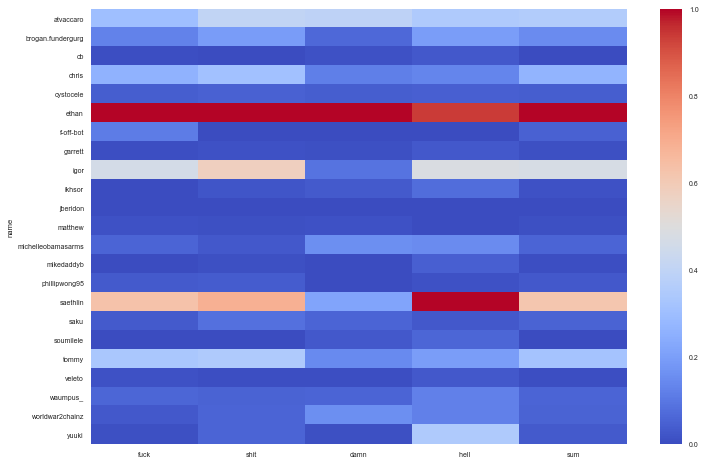

In [145]:
import matplotlib.pyplot as plt
norm_swears = (swears - swears.min()) / (swears.max() - swears.min())
plt.figure(figsize=(12, 8))
sns.heatmap(norm_swears, cmap='coolwarm')

In [152]:
total_messages = df[['name', 'text']].groupby('name').agg('count')
divided = swears[['fuck', 'shit', 'damn', 'hell ']].div(total_messages['text'], axis=0).dropna()
divided.drop('f-off-bot', inplace=True)
divided

,fuck,shit,damn,hell
name,,,,
atvaccaro,0.006299,0.007865,0.001867,0.000277
brogan.fundergurg,0.022675,0.031845,0.002519,0.001310
cb,0.011270,0.007513,0.003757,0.001503
chris,0.020327,0.022486,0.002114,0.000405
cystocele,0.020914,0.023390,0.004403,0.000826
ethan,0.021865,0.020506,0.005062,0.000795
garrett,0.010477,0.015191,0.002095,0.001048
igor,0.022663,0.026592,0.001053,0.000911
ikhsor,0.000538,0.001614,0.000500,0.000192


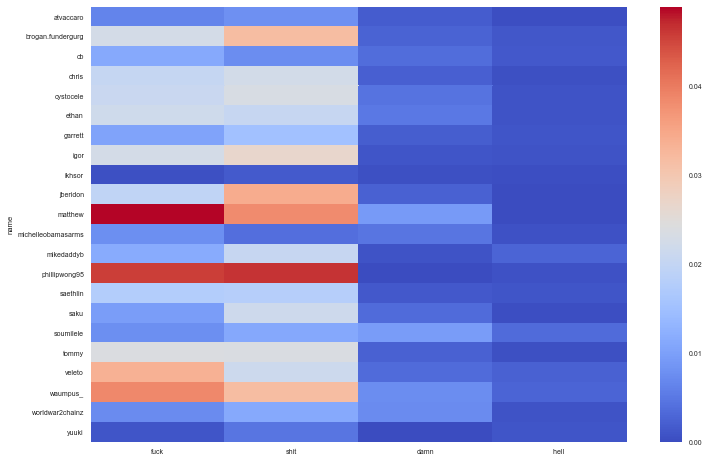

In [155]:
plt.figure(figsize=(12, 8))
sns.heatmap(divided, cmap='coolwarm')